In [1]:
import nbpresent
nbpresent.__version__

'3.0.2'

In [9]:
#pre-req
#Install: Anaconda 4.4.0, Keras 2.0.6, Tensorflow 1.2.1, Python 3.6.1, RISE, NB-CONDA

<h1>Deep Learning in Computer Vision</h1>
<br>
<a href="http://home.cse.shirazu.ac.ir/~m.valipour/">Mojtaba Valipour</a> @ Shiraz University
<h5>Workshop: 24 October, 2017: 19th Artificial Intelligence and Signal Processing Conference (AISP2017)</h5>


<div style="width: 200px; float:right;margin:0 10px 10px 0" markdown="1">
![tfImage](elements/images/kerasLogo.png)
</div>

<img src="elements/images/phd.jpg" alt="PHD Comic" align="middle" style="width: 950px;"/>

Download Contents of Workshop Here:
https://github.com/mvpcom/ShirazuDL

## Deep Learning Frameworks

    * Tensorflow
    * Theano (R.I.P)
    * Keras
    * Caffe
    * Torch
    * Deeplearning4j
    * MXNet
    * Microsoft Cognitive Toolkit

### What is Keras? 

Keras is a high-level neural networks API, for fast experimentation, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

### Setup Environment

* Install Anaconda 4.4.0 (https://repo.continuum.io/archive/)
* pip install tensorflow==1.2.1
* pip install keras==2.0.6
* conda install -c conda-forge opencv
* To solve some installation error: conda install --force html5lib

### Intro to Keras

[//]: <> (REF: http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/example_network.svg)
<img src="elements/images/applications/example_network.svg" alt="AE" align="right" style="width: 400px;"/>

* Dense
* Activation
* Flatten

[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/09/keras-workflow.jpg)
<img src="elements/images/applications/keras-workflow.jpg" alt="AE" align="middle" style="width: 1000px;"/>

#### Load Dataset

In [12]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


##### Visualize Dataset

In [18]:
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


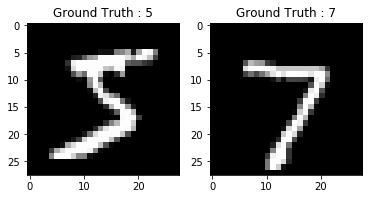

In [19]:
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

#### Process the data

In [20]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [21]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [22]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


#### Create a Model 

In [26]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

#### Configure Model

In [27]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train Model

In [28]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s - loss: 0.2716 - acc: 0.9166 - val_loss: 0.1113 - val_acc: 0.9650
Epoch 2/5
60000/60000 [==============================] - 20s - loss: 0.0912 - acc: 0.9718 - val_loss: 0.0771 - val_acc: 0.9752
Epoch 3/5
60000/60000 [==============================] - 21s - loss: 0.0579 - acc: 0.9816 - val_loss: 0.0734 - val_acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 20s - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0833 - val_acc: 0.9761
Epoch 5/5
60000/60000 [==============================] - 21s - loss: 0.0293 - acc: 0.9904 - val_loss: 0.0916 - val_acc: 0.9740


#### Evaluate Model

In [29]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

 9920/10000 [============================>.] - ETA: 0sEvaluation result on Test Data : Loss = 0.09164393389469479, accuracy = 0.974


#### Get Prediction

In [36]:
model.predict(test_data[[0],:])

array([[  1.16692034e-09,   3.66302905e-10,   7.04322147e-08,
          6.12229272e-08,   2.00628319e-13,   7.51009671e-11,
          1.56821088e-15,   9.99999523e-01,   5.44588652e-10,
          3.59636005e-07]], dtype=float32)

#### Discussion

In [30]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


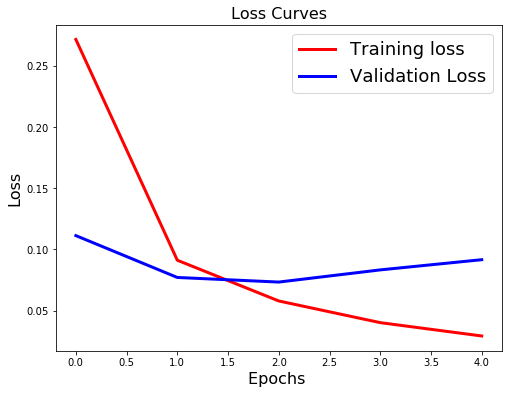

In [33]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

### Regularization

#### Overfitting

[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/loss-curve-without-reg.png)
[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/acc-curve-without-reg.png)
<table align="center">
<tr>
<td> <img src="elements/images/applications/loss-curve-without-reg.png" alt="RE" align="middle" style="width: 400px;"/></td>
<td> <img src="elements/images/applications/acc-curve-without-reg.png" alt="RE" align="middle" style="width: 400px;"/> </td>
</tr>
</table>

* The validation loss is increasing
* The difference between the train and validation accuracy is very high

[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/loss-curve-with-reg.png)
[//]: <> (REF: https://www.learnopencv.com/wp-content/uploads/2017/10/acc-curve-with-reg.png)
<table align="center">
<tr>
<td> <img src="elements/images/applications/loss-curve-with-reg.png" alt="RE" align="middle" style="width: 400px;"/></td>
<td> <img src="elements/images/applications/acc-curve-with-reg.png" alt="RE" align="middle" style="width: 400px;"/> </td>
</tr>
</table>

#### Dropout

[//]: <> (REF: http://everglory99.github.io/Intro_DL_TCC/intro_dl_images/dropout1.png)
<img src="elements/images/applications/dropout1.png" alt="DR" align="middle" style="width: 1100px;"/>

keras.layers.Dropout(rate, noise_shape=None, seed=None)

More: http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

#### Lp-Norm

[//]: <> (REF: https://www.researchgate.net/profile/Younghak_Shin2/publication/230633149/figure/fig7/AS:300644943581190@1448690748255/Figure-9-L1-and-L2-norm-minimization.png)
<img src="elements/images/applications/Figure-9-L1-and-L2-norm-minimization.png" alt="LPNORM" align="middle" style="width: 600px;"/>

[//]: <> (REF: https://www.youtube.com/watch?v=sO4ZirJh9ds)
<img src="elements/images/applications/regu.png" alt="LPNORM" align="middle" style="width: 600px;"/>

* kernel_regularizer: Regularizer function applied to the kernel weights matrix
* bias_regularizer: Regularizer function applied to the bias vector
* activity_regularizer: Regularizer function applied to the output of the layer (its "activation")

keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

In [38]:
from keras import regularizers

* keras.regularizers.l1(0.)
* keras.regularizers.l2(0.)
* keras.regularizers.l1_l2(0.)

## Concepts and Techniques

### Convolutions

[//]: <> (REF: https://i.stack.imgur.com/SFST9.gif)
[//]: <> (REF: https://cdn-images-1.medium.com/max/1600/1*1VJDP6qDY9-ExTuQVEOlVg.gif)
<table align="center">
<tr>
<td> <img src="elements/images/applications/SFST9.gif" alt="CONV" align="middle" style="width: 400px;"/> </td>
<td> <img src="elements/images/applications/conv.gif" alt="CONV" align="middle" style="width: 300px;"/> </td>
</tr>
</table>


### Auto-Encoders

[//]: <> (REF: https://siavashk.github.io/assets/ae1.jpg)
<img src="elements/images/applications/ae1.jpg" alt="AE" align="middle" style="width: 800px;"/>

<h5>Why AutoEncoders?</h5>
    1. Many Algorithms works well only in Low Dimensional Cases
    2. Huge efforts need to provide annotated examples
    3. AutoEncoders are great for reconstruction

[//]: <> (REF: https://cdn-images-1.medium.com/max/1600/1*8ixTe1VHLsmKB3AquWdxpQ.png)
<img src="elements/images/applications/1-8ixTe1VHLsmKB3AquWdxpQ.png" alt="AE" align="middle" style="width: 1000px;"/>

Autoencoders:
* Undercomplete AutoEncoder
* Regularized AutoEncoder
* Sparse AutoEncoder
* Denosoising AutoEncoder
* Variational AutoEncoder
* Seq2Seq AutoEncoder
* etc. 

[//]: <> (REF: https://deeplearning4j.org/img/deep_autoencoder.png)
<img src="elements/images/applications/deep_autoencoder.png" alt="AE" align="middle" style="width: 600px;"/>

You can find more detail about implementation of autoencoders here:
    * https://github.com/mvpcom/ShirazuDL/blob/master/July%202017/01_KerasExample_FirstDay.ipynb
    * https://github.com/mvpcom/ShirazuDL/blob/master/July%202017/02_KerasExamples_SecondDay.ipynb

### Skip Connection

[//]: <> (REF: https://image.slidesharecdn.com/dlsl2017d2l6advanceddeeparchitectures-170125171011/95/advanced-deep-architectures-d2l6-deep-learning-for-speech-and-language-upc-2017-17-638.jpg?cb=1485364567)
<img src="elements/images/applications/advanced-deep-architectures.jpg" alt="SK" align="middle" style="width: 700px;"/>

### Residual Block

[//]: <> (REF: https://mblogthumb-phinf.pstatic.net/MjAxNzA0MjZfMTAg/MDAxNDkzMTc2MTk5MjY3.ZNrpsJ6UlcgaaZHR5QlLlZK0vp8Azuoyu84aH1hqD4wg.ZAJlUZiwje3HIuB1mxFnh9t5no1NcIg1_pXLIC4RWxcg.PNG.kangdonghyun/image.png?type=w800)
<img src="elements/images/applications/residualBlock.png" alt="RB" align="middle" style="width: 900px;"/>

In [57]:
import keras
from keras.layers import Conv2D, Input

# input tensor for a 3-channel 256x256 image
x = Input(shape=(256, 256, 3))
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(3, (3, 3), padding='same')(x)
# this returns x + y.
z = keras.layers.add([x, y])

In [61]:
from keras.models import Model
Model(inputs=x,outputs=z).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
conv2d_3 (Conv2D)                (None, 256, 256, 3)   84          input_3[0][0]                    
____________________________________________________________________________________________________
add_2 (Add)                      (None, 256, 256, 3)   0           input_3[0][0]                    
                                                                   conv2d_3[0][0]                   
Total params: 84
Trainable params: 84
Non-trainable params: 0
____________________________________________________________________________________________________


### Transposed Convolution

[//]: <> (REF: http://deeplearning.net/software/theano/_images/no_padding_no_strides_transposed.gif)
<img src="elements/images/applications/no_padding_no_strides_transposed.gif" alt="RB" align="middle" style="width: 300px;"/>

### Dilated Convolution

[//]: <> (REF: http://deeplearning.net/software/theano/_images/dilation.gif)
<img src="elements/images/applications/dilation.gif" alt="RB" align="middle" style="width: 300px;"/>

### Inception Module

[//]: <> (REF: https://i.ytimg.com/vi/VxhSouuSZDY/maxresdefault.jpg)
<img src="elements/images/applications/maxresdefault.jpg" alt="AE" align="middle" style="width: 600px;"/>

In [62]:
from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(256, 256, 3))

tower_1 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)

### Fully Convolutional Networks

[//]: <> (REF: http://www.cvc.uab.es/people/joans/slides_tensorflow/tensorflow_html/layers_files/segnet.png)
<img src="elements/images/applications/segnet.png" alt="AE" align="middle" style="width: 800px;"/>

[//]: <> (REF: http://rnd.azoft.com/wp-content/uploads_rnd/2016/11/overall-1024x256.png)
<img src="elements/images/applications/overall-1024x256.png" alt="AE" align="middle" style="width: 800px;"/>

### Fine-Tuning and Frozen Layers

In [ ]:
trainable=False
frozen_layer = Dense(32, trainable=False)

In [ ]:
x = Input(shape=(32,))
layer = Dense(32)
layer.trainable = False
y = layer(x)

frozen_model = Model(x, y)
# in the model below, the weights of `layer` will not be updated during training
frozen_model.compile(optimizer='rmsprop', loss='mse')

layer.trainable = True
trainable_model = Model(x, y)
# with this model the weights of the layer will be updated during training
# (which will also affect the above model since it uses the same layer instance)
trainable_model.compile(optimizer='rmsprop', loss='mse')

frozen_model.fit(data, labels)  # this does NOT update the weights of `layer`
trainable_model.fit(data, labels)  # this updates the weights of `layer`

### Image Augmentation and Data Providing 

## Popular State-of-The-Art Models

### VGG16/19

[//]: <> (REF: https://www.pyimagesearch.com/wp-content/uploads/2017/03/imagenet_vgg16.png)
<img src="elements/images/applications/imagenet_vgg16.png" alt="VGG" align="middle" style="width: 500px;"/>

In [68]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
#model = VGG16(weights='imagenet', include_top=True)

### Microsoft ResNet

[//]: <> (REF: http://book.paddlepaddle.org/03.image_classification/image/resnet.png)
<img src="elements/images/applications/resnet.png" alt="ResNet" align="middle" style="width: 800px;"/>

In [71]:
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

### Yolo 

[//]: <> (REF: https://chaosmail.github.io/images/deep-learning/localizationVsDetection.png)
<img src="elements/images/applications/localizationVsDetection.png" alt="OB" align="middle" style="width: 800px;"/>

[//]: <> (REF: https://pjreddie.com/media/image/model2.png)
<img src="elements/images/applications/model2.png" alt="YOLO" align="middle" style="width: 800px;"/>

[//]: <> (REF: https://github.com/xslittlegrass/CarND-Vehicle-Detection/blob/master/output_images/mode_yolo_plot.jpg)
<img src="elements/images/applications/mode_yolo_plot.jpg" alt="YOLO" align="middle" style="width: 1200px;"/>

[//]: <> (REF: https://github.com/xslittlegrass/CarND-Vehicle-Detection/blob/master/output_images/net_output.png)
<img src="elements/images/applications/net_output.png" alt="YOLO" align="middle" style="width: 800px;"/>

## Applications

 * Image Classification *
 * Image Segmentation *
 * Object Detection
 * Image Generation
 * Scene Understanding

### Traffic Light Classification

In [72]:
import os

from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Convolution2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.optimizers import Adam

In [73]:
NUM_CHANNELS = 3
IMAGE_WIDTH = 224 
IMAGE_HEIGHT = 224 
NUM_CLASSES = 2

In [74]:
# keras image generator
def get_generator(directory, train):
    if train:
        datagen = ImageDataGenerator(
          rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True)
    else:
        datagen = ImageDataGenerator(rescale=1./255)
    
    return datagen.flow_from_directory(
        directory=directory,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=8,
        class_mode='categorical')

In [75]:
import matplotlib.pyplot as plt
def plotSpecialTool(data,labels,samples2Visualize=12,factors=[2,6], figsize=(20,12), grayFlag=False, thr=0.0):
    # samples2Visualize = 12 # sample 12 random number
    # factors = [2,6] # indicate two factors for number of samples
    assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
    figure = plt.figure(figsize=figsize)
    nLimit = data.shape[0]
    for i in range(1,samples2Visualize+1):
        img = figure.add_subplot(factors[0],factors[1],i)
        # randomly sample an image from train set
        imgID = np.random.randint(nLimit-1)
        image = data[imgID]
        #image = image[60:150,:]
        if grayFlag:
            plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(image)
        img.set_title(labels[imgID],fontsize=7)
        plt.axis('off')
#plotSpecialTool(centerImgs,labelsCSV["label"],factors=[3,4],thr=0.0,grayFlag=False)

In [77]:
# load images
import cv2
import numpy as np
from scipy import misc
def loadImg(imgLoc):
    imageLocation = imgLoc
    image = misc.imread(imageLocation) #cv2.imread(imageLocation) # BGR
    #b,g,r = cv2.split(image)       # get b,g,r
    #image = cv2.merge([r,g,b])     # switch it to rgb

    if (image is None):
        print(imageLocation)
     
    image = cv2.resize(image, (224, 224))
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
#numSample = 12
#centerImgs = np.array([loadImg(imgLoc) for imgLoc in labelsCSV['filename'][0:numSample]])

In [86]:
directory = './Dataset/'
train_generator = get_generator(directory+'train', True)
validation_generator = get_generator(directory+'val', False)

Found 3922 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [87]:
model = Sequential([
  Convolution2D(16, (3, 3), padding='same', strides=(2, 2), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS), activation='relu'),
  MaxPooling2D(pool_size=(3, 3)),
  Dropout(0.2),

  Convolution2D(32, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(3, 3)),
  Dropout(0.2),

  Convolution2D(64, (3, 3), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.2),

  Flatten(),
  Dense(128, activation='tanh'),
  Dropout(0.5), # 0.3 works fine
  Dense(NUM_CLASSES, activation='softmax'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 112, 112, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
__________

In [88]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
model.compile(optimizer=Adam(lr=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
filepath="./logs/-{epoch:02d}-val_acc-{val_acc:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False, mode='auto')
tensorboard = keras.callbacks.TensorBoard(log_dir='./tensorboard', histogram_freq=0, write_graph=True, write_images=True)
callbacks = [checkpoint, tensorboard]

In [89]:
# balance dataset
#ls -al | grep ^[-] | wc -l # to count files
# Red: 2621/3973 =  , Non_Red: 1353/3973 = 

# manual
class_weight = {0:34 , 1:66}

In [ ]:
import h5py
model.fit_generator(
  train_generator,
  steps_per_epoch=train_generator.n,
  epochs=1,
  class_weight=class_weight,
  validation_data=validation_generator,
  validation_steps=validation_generator.n,
  callbacks=callbacks,
)

Epoch 1/1
2326/3922 [================>.............] - ETA: 782s - loss: 1.5620 - acc: 0.9905

In [ ]:
model.evaluate_generator(validation_generator, steps=len(validation_generator.filenames))

In [ ]:
# load best weights for the model
from keras.models import load_model
model = load_model('./logs/-01-val_acc-0.98.hdf5')

In [ ]:
model.evaluate_generator(validation_generator, steps=len(validation_generator.filenames))

In [ ]:
labels = ['Non-Red', 'Red']

In [ ]:
# test the best model on the test pictures
%matplotlib inline
import glob
testDir = directory+'test/'
files = glob.glob(testDir+'*')
imgL = []
tlStatusL = []
for file in files: 
    # load image
    img = loadImg(file)
    # predict 
    tlStatus = model.predict(img.reshape(1,img.shape[0],img.shape[1],img.shape[2]),batch_size=1)
    # plot
    imgL.append(img)
    tlStatusL.append(labels[np.argmax(tlStatus)])
    #print(labels[np.argmax(tlStatus)])
    #plt.imshow(img)

In [ ]:
print(len(tlStatusL))

In [ ]:
plotSpecialTool(np.array(imgL[0:25]),np.array(tlStatusL[0:25]),samples2Visualize=25,factors=[5,5], figsize=(20,20),thr=0.0,grayFlag=False)

In [ ]:
plotSpecialTool(np.array(imgL[50:75]),np.array(tlStatusL[50:75]),samples2Visualize=25,factors=[5,5], figsize=(20,20),thr=0.0,grayFlag=False)

In [65]:
'''
References:

    * Thanks to Udacity SDCND and nVidia 
    * https://keras.io/getting-started/functional-api-guide/
    * https://www.udacity.com/course/self-driving-car-engineer-nanodegree--nd013
    * https://keras.io/
    * https://deeplearning4j.org/deepautoencoder
    * https://blog.keras.io/building-autoencoders-in-keras.html
    * http://www.birving.com/presentations/autoencoders/index.html
    * http://www.deeplearningbook.org/contents/autoencoders.html
    * https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/
    * https://keras.io/regularizers/
    * https://www.researchgate.net/figure/230633149_fig7_Figure-9-L1-and-L2-norm-minimization
    * https://www.youtube.com/watch?v=sO4ZirJh9ds
    * https://www.slideshare.net/BAINIDA/deep-learning-and-image-analytics-using-python-by-dr-sanparit
    * https://mblogthumb-phinf.pstatic.net/MjAxNzA0MjZfMTAg/MDAxNDkzMTc2MTk5MjY3.ZNrpsJ6UlcgaaZHR5QlLlZK0vp8Azuoyu84aH1hqD4wg.ZAJlUZiwje3HIuB1mxFnh9t5no1NcIg1_pXLIC4RWxcg.PNG.kangdonghyun/image.png?type=w800
    * https://siavashk.github.io/2016/02/22/autoencoder-imagenet/
    * https://keras.io/getting-started/faq/#how-can-i-freeze-keras-layers
    * https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras
    * https://stackoverflow.com/questions/44274701/make-predictions-using-a-tensorflow-graph-from-a-keras-model
    * https://github.com/burgalon/deep-learning-traffic-lights/blob/master/train.py
    * https://www.tensorflow.org
    * https://github.com/ulmefors/CarND-Capstone/blob/master/classifiers/WholePicDL/trafficLightClassifer.ipynb
    * http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
    * http://www.cvc.uab.es/people/joans/slides_tensorflow/tensorflow_html/layers.html
    * https://github.com/xslittlegrass/CarND-Vehicle-Detection
'''
print('Copyright is important @2017')

Copyright is important @2017
